Nirit Trabelsi 207781220

Adi Regev 208884536 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix

import os,sys
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix,roc_auc_score,roc_curve

from sklearn import datasets
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPClassifier
from google.colab import drive



#get data

In [ ]:


drive.mount('/content/gdrive')
path = 'gdrive/MyDrive/Colab/Mini project/diabetes.csv'#nirit
df = pd.read_csv(path) # load from file on the drive
df = shuffle(df)#to mix the data


X = df.drop("Outcome",axis=1)#data Frame
Y=df["Outcome"]


h=0
for col in X.columns:# Change zeros to None ,for features that we think they put 0 insted of Nan
  if h>0 and h<=5:
        X[col][X[col]==0]=None#remove 0 to make a Nan
        h=h+1
# split to train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.30,random_state=0)#not data frame but np.array
 

# Model

In [ ]:
# the ML is by pipe-there we first change NAN to median, second we normalaized, then we used yeo-johnson, later we choose 5 K-best
#after all that we use MLPClassifier to make Neuron Network In structure---1,4,28,1--logistic----200 iter---momentum 0.009 ---solver adam---

mypipeline = Pipeline([
    ('imputer' , SimpleImputer(missing_values=np.nan, strategy='median')),#make Nan to median
    ('normalizer', StandardScaler()), # normalize data
    ('yeo-johnson',  PowerTransformer(method='yeo-johnson')), #transforming numerical input variables to have a Gaussian or more-Gaussian-like probability distribution.
    ('select' , SelectKBest(f_classif, k=5)),#get 5 k best by t-test
    ('NN', MLPClassifier(activation='logistic', alpha=0.0001, batch_size=23, # Neuron Network
              epsilon=1e-08, hidden_layer_sizes=( 1, 4 ,28 , 1), learning_rate='adaptive', max_iter=200,
              momentum=0.009, nesterovs_momentum=True, 
              shuffle=True, solver='adam', random_state=1))
   ])
  mypipeline.steps





In [ ]:
# Cross Valdition 10 times
cv=KFold(n_splits=10)
recall = cross_val_score(mypipeline, X,Y, scoring='recall', cv=cv)#get recall
print("recall",np.around(recall,2),np.mean(np.around(recall,2)))

precision = cross_val_score(mypipeline, X, Y, scoring='precision', cv=cv)#get precision
print("precision",np.around(precision,2),np.mean(np.around(precision,2)))

acc = cross_val_score(mypipeline, X, Y, scoring='accuracy', cv=cv)#get accuracy
print("'accuracy'",np.around(acc,2),np.mean(np.around(acc,2)))


In [ ]:
# test the pipe with Train_and_Test
mypipeline.fit(X_train, Y_train)
y_pred= mypipeline.predict(X_test)
print(mypipeline.score(X_test, Y_test))
#   if  mypipeline.score(X_test, Y_test)>=0.78 or round(recall_score(Y_test, y_pred),2)>0.78:
#       flag=False



In [ ]:
from joblib import dump, load
dump(mypipeline, 'mypipeline_n.joblib')#save the model  
clf = load('mypipeline_n.joblib')#get the model 
clf.score(X_test, Y_test)#see if its working


#our best Model

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.30,random_state=0)#not data frame np.array
clf = load('mypipeline_84.joblib') #  get model-we call it mypipeline_84 because with cross_validesion this is the recalll we get

clf.score(X_test, Y_test)
y_pred=clf.predict(X_test)

print("accuracy_score",round(accuracy_score(Y_test, y_pred),2),"\n",
      "recall_score",round(recall_score(Y_test, y_pred),2),"\n",
      "precision_score",round(precision_score(Y_test, y_pred),2),"\n"
      "confusion_matrix\n",confusion_matrix(Y_test, y_pred))

#מכאן ומטה יש את הפונקציות והקוד של איך מצאנו את הרשת נוירונים הכי טובה


#עשינו מספר רב של הרצות בהם שינינו את מספר השכבות, ומספר הקודקודים בכל שיכבה, בנוסף לשינוי הדתא 

#השוני של הדתא הוא בגלל עיבוד שונה שלה- אז היו לנו כמה דאתות
#ניתן כאן מספר קטן של התוצאות הכי טובות כצילום מסך של  חלק מהטבלאות שיצאו מהקוד למטה

#get data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/MyDrive/Colab/Mini project/diabetes.csv'#nirit
df = pd.read_csv(path) # load from file on the drive
df = shuffle(df)#to mix data
X = df.drop("Outcome",axis=1)#data Frame
Y=df["Outcome"]

#see

#remove nan and 0 to median in Glucose BloodPressure SkinThickness Insulin and BMI-its look like they pot 0 insted of NA

In [ ]:
f, axs = plt.subplots(1, len(X.columns),figsize=(25,5))
h=0
for col in X.columns:
    if h>0 and h<=5:
        X[col][X[col]==0]=None#remove 0 make a Nan
    axs[h].hist(X[col],  bins=40,label=col) 
    axs[h].set_title(col) 
    h=h+1
print("\n",df.describe().to_string(),"\n")
print("\n",X.describe().to_string(),"\n")


#ניתוח הדתא
חלוקה לטרין וטסט
נירמול או גאוס או גם וגם



In [ ]:
from sklearn.preprocessing import PowerTransformer

# Split the data to train and test (70%-30%)
# Stratify keeps the ratio between healty and sicks as the original data. 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.30,random_state=0) # The results are NOT a data frame, but np.array


###################   
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # make Nan to median in the data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler() # norm
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)

# johnson without norm
yj = PowerTransformer(method='yeo-johnson')
X_train_yj = yj.fit_transform(X_train)
X_test_yj = yj.transform(X_test)

# johnson with norm
yj = PowerTransformer(method='yeo-johnson')
X_train_yj_N = yj.fit_transform(X_train_norm)
X_test_yj_N = yj.transform(X_test_norm )

#find best k *BEST*

In [ ]:
select = SelectKBest(f_classif, k=5)#t test chase the 5 best parameters
X_train_f = select.fit_transform(X_train_norm, Y_train)#normal
X_test_f = select.transform(X_test_norm)

X_train__yj_N5 = select.fit_transform(X_train_yj_N, Y_train)#jysun normal
X_test__yj_N5 = select.transform(X_test_yj_N)
X_train__yj5 = select.fit_transform(X_train_yj, Y_train)#jysun
X_test__yj5 = select.transform(X_test_yj)

select = SelectKBest(f_classif, k=3)#t test chase the 3 best parameters
X_train_3 = select.fit_transform(X_train_norm, Y_train)#nurmal
X_test_3 = select.transform(X_test_norm)
X_train__yj_N3 = select.fit_transform(X_train_yj_N, Y_train)#jysun nurmal
X_test__yj_N3 = select.transform(X_test_yj_N)
X_train__yj3 = select.fit_transform(X_train_yj, Y_train)#jysun
X_test__yj3 = select.transform(X_test_yj)

select = SelectKBest(f_classif, k=2)#t test chase the 2 best parameters
X_train_2 = select.fit_transform(X_train_norm, Y_train)#nurmal
X_test_2 = select.transform(X_test_norm)
X_train__yj_N2 = select.fit_transform(X_train_yj_N, Y_train)#jysun nurmal
X_test__yj_N2 = select.transform(X_test_yj_N)
X_train__yj2 = select.fit_transform(X_train_yj, Y_train)#jysun
X_test__yj2 = select.transform(X_test_yj)

In [ ]:
K={"simpN5":[X_train_f,X_test_f],"ygN5":[X_train__yj_N5,X_test__yj_N5],"yg5":[X_train__yj5 ,X_test__yj5],
   "simpN3":[X_train_3,X_test_3],"ygN3":[X_train__yj_N3,X_test__yj_N3],"yg3":[X_train__yj3 ,X_test__yj3],
   "simpN2":[X_train_2,X_test_2],"ygN2":[X_train__yj_N2,X_test__yj_N2],"yg2":[X_train__yj2 ,X_test__yj2]}

In [ ]:
import csv 
#function to save results of model in drive in CSV
def File(a_list,name):
    file = open("gdrive/MyDrive/Colab/Mini project/1.7.2021_1.4.somthimg/"+name+'.csv', 'w+', newline ='') 
    with file:     
       write = csv.writer(file) 
       write.writerows(a_list)

In [ ]:
#function that run model and print its structure and results of acc,recall, and precision
#run on all differents data
#clf - MODEL
#K- data
# k,j,g,w-structor


#we changed the number of layers and different number of vertices
def Change_layer(clf,K,Y_train,Y_test,receall_79,receall_69,acc_79,k,j,g,w):
    for i in K:
    #run on all data-work on with or without normalization,if and without Jason, and if or without choosing the best 5 featurs.
                print(i)
                print(g ,",",j,",",k,",",w)#print structure

                x_t=K[i][0]#train 
                x_s=K[i][1]#test
                #In green if we want to do cross validation-tak more time
                # X = np.append(x_t, x_s, axis=0) 
                # y= np.append(Y_train,Y_test, axis=0) 
                # cv=KFold(n_splits=10)
                # scores = (cross_val_score( clf, X, y, cv=cv, scoring='f1_macro') ).mean()
                # recall = (cross_val_score(clf, X, y, scoring='recall', cv=cv)).mean()
                # pre = (cross_val_score(clf, X, y, scoring='precision', cv=cv)).mean()
                # accuracy = (cross_val_score(clf, X,y, scoring='accuracy', cv=cv)).mean()
                
                clf.fit(x_t,Y_train) 
                y_pred=clf.predict(x_s)
                #SAVE ONLY GOOD RESULTS
                if round(recall_score(Y_test, y_pred),2)>0.79:
                    acc=[[g,j,k,w],[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    recall_79.append(acc)
                if round(recall_score(Y_test, y_pred),2)>0.68:
                    acc=[[g,j,k,w],[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    recall_69.append(acc)
                if round(round(accuracy_score(Y_test, y_pred),2),2)>0.68:
                    acc=[[g,j,k,w],[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    acc_79.append(acc)
                #  print('Accuracy: ',round(accuracy_score(Y_test, y_pred),2))
                #  print('Recall: ',round(recall_score(Y_test, y_pred),2))
                #  print('Precision: ',round(precision_score(Y_test, y_pred),2))  
                #  print(classification_report(Y_test, y_pred))
                #  print(confusion_matrix(Y_test, y_pred)) #  true negatives  , false negatives  , true positives , false positives

    return acc_79,recall_79, recall_69#RETURN ONLY GOOD RESULTS



#try to find the best NN

#here we allready know that the Model (1,4,somthing,1) is good
#we trying to find the best one 
#and also the BEST k-best

In [ ]:
#function that run model and print its structure and results of acc,recall, and precision
#run on all diffrents data
### get structure in one arg-n

#the same idea from the first function
def Data(clf,K,Y_train,Y_test,receall_79,receall_69,acc_79,n):
    for i in K:#run on all data worked on with or without normalization, if and without Jason, and if or without choosing the top 5.
                print(i)
                print(n)
                x_t=K[i][0]
                x_s=K[i][1]
                clf.fit(x_t,Y_train) 
                X = np.append(x_t, x_s, axis=0) 
                y= np.append(Y_train,Y_test, axis=0) 
                cv=KFold(n_splits=10)
                scores = (cross_val_score( clf, X, y, cv=cv, scoring='f1_macro') ).mean()
                recall = (cross_val_score(clf, X, y, scoring='recall', cv=cv)).mean()
                pre = (cross_val_score(clf, X, y, scoring='precision', cv=cv)).mean()
                accuracy = (cross_val_score(clf, X,y, scoring='accuracy', cv=cv)).mean()
                if scores>0.79 or recall>0.69 or accuracy>0.69:#SAVE BEST MODEL
                      acc=[n,[i],["accuracy_score",round(accuracy,2)],["recall_score",round(recall,2)],["precision_score",round(pre,2)],["f1",round(scores,2)]]
                      recall_79.append(acc)
                      print(["accuracy_score",round(accuracy,2)],["recall_score",round(recall,2)],["precision_score",round(pre,2)],["f1",round(scores,2)])
                y_pred=clf.predict(x_s)
                if round(recall_score(Y_test, y_pred),2)>0.73:#SAVE BEST MODEL
                    acc=[n,[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    recall_79.append(acc)
                    print('Accuracy: ',round(accuracy_score(Y_test, y_pred),2))
                if round(recall_score(Y_test, y_pred),2)>0.68:#SAVE BEST MODEL
                    acc=[n,[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    recall_69.append(acc)
                    print('Recall: ',round(recall_score(Y_test, y_pred),2))
                if round(round(accuracy_score(Y_test, y_pred),2),2)>0.68:#SAVE BEST MODEL
                    acc=[n,[i],["accuracy_score",round(accuracy_score(Y_test, y_pred),2)],["recall_score",round(recall_score(Y_test, y_pred),2)],["precision_score",round(precision_score(Y_test, y_pred),2)],["confusion_matrix",confusion_matrix(Y_test, y_pred)]]
                    acc_79.append(acc)
               
    return acc_79,recall_79, recall_69

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
recall_79=[]
recall_69=[]
acc_79=[]
#Here we choose to find best model of (1,4,somthing,1)
j=len(recall_79)+len(acc_79)#size 
for g in range(1,64):#first layer
  clf =MLPClassifier(activation='logistic', alpha=0.0001, batch_size=23, 
              epsilon=1e-08, hidden_layer_sizes=(1,4,g,1), learning_rate='adaptive', max_iter=200,
              momentum=0.009, nesterovs_momentum=True, 
              shuffle=True, solver='adam', random_state=1)
  acc_79,recall_79, recall_69=Data(clf,K,Y_train,Y_test,recall_79,recall_69,acc_79,(1,4,g,1))#run model and get only the ones that have good results
  #if want to use Change_layer function send-Change_layer(clf,K,Y_train,Y_test,recall_79,recall_69,acc_79,k,j,g,w)-and need to make FOR loops for that
  if j<len(recall_79)+len(acc_79):#save new good models only if really found a new good model
     File(recall_79,"recall_1.7")#save
     File(acc_79,"acc_1.7") #save
     j=len(recall_79)+len(acc_79)#new size
from google.colab import drive
drive.mount('/content/gdrive')
          




#from here we tried to find best model from best models that we found before- from runing Models with different number of layers and different number of vertices

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
recall_79=[]
recall_69=[]
acc_79=[]    
reshtot=[(1,4,28,1),(32,20,8,57),(7,34,1),(1,4,3,1),(1,5,15,1),#this is just a little part of the best models that we test again- 
                  (34,7,1),(1,4,33,1)]                         #after we found that they have good results
         
j=len(recall_79)+len(acc_79)
for i in reshtot:#first layer
  clf =MLPClassifier(activation='logistic', alpha=0.0001, batch_size=23, #early_stopping=True, 
              epsilon=1e-08, hidden_layer_sizes=i, learning_rate='adaptive', max_iter=200,#,verbose=True,
              momentum=0.009, nesterovs_momentum=True, 
              shuffle=True, solver='adam', random_state=1)
  acc_79,recall_79, recall_69=Data(clf,K,Y_train,Y_test,recall_79,recall_69,acc_79,i)
  if j<len(recall_79)+len(acc_79):
     File(recall_79,"recall_2.7_2.3.5 second")#save
     File(acc_79,"recall_2.7_2.3.5 second") #save
     j=len(recall_79)+len(acc_79)


# example of a good model

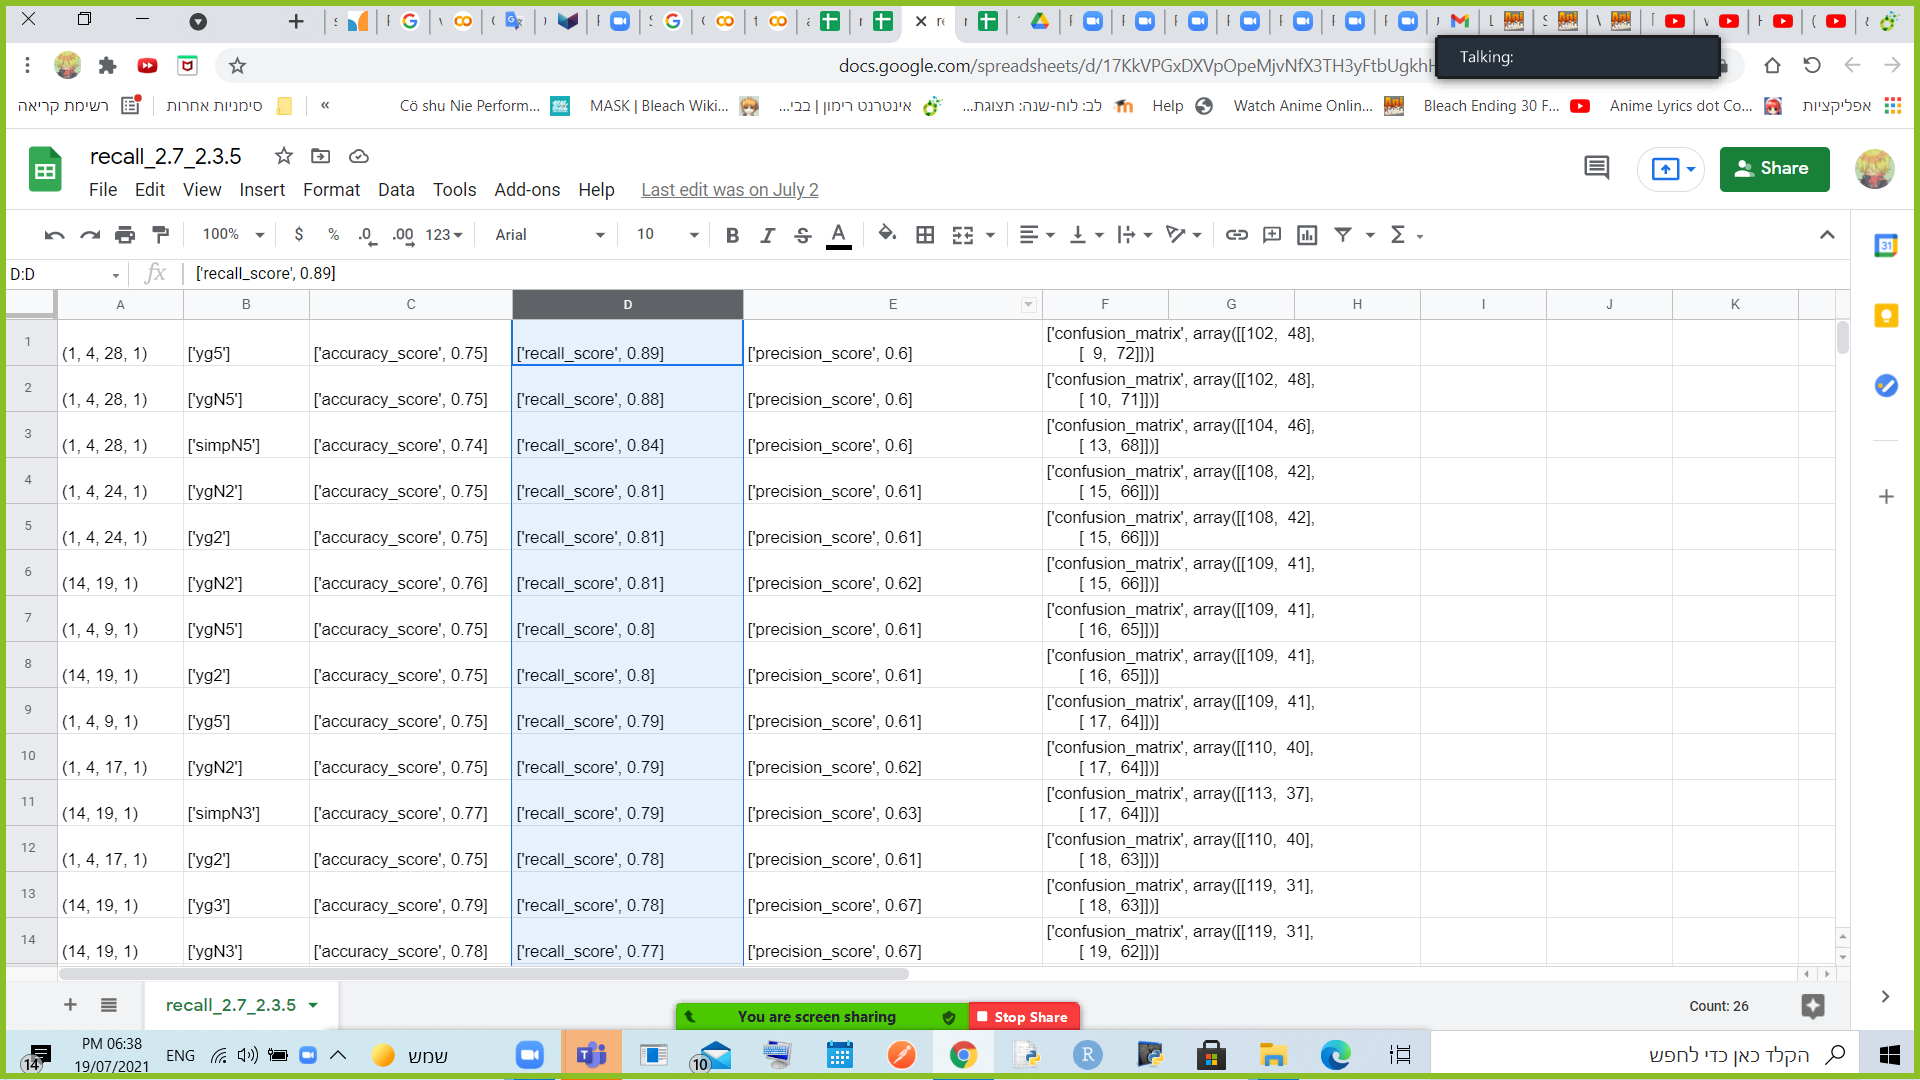

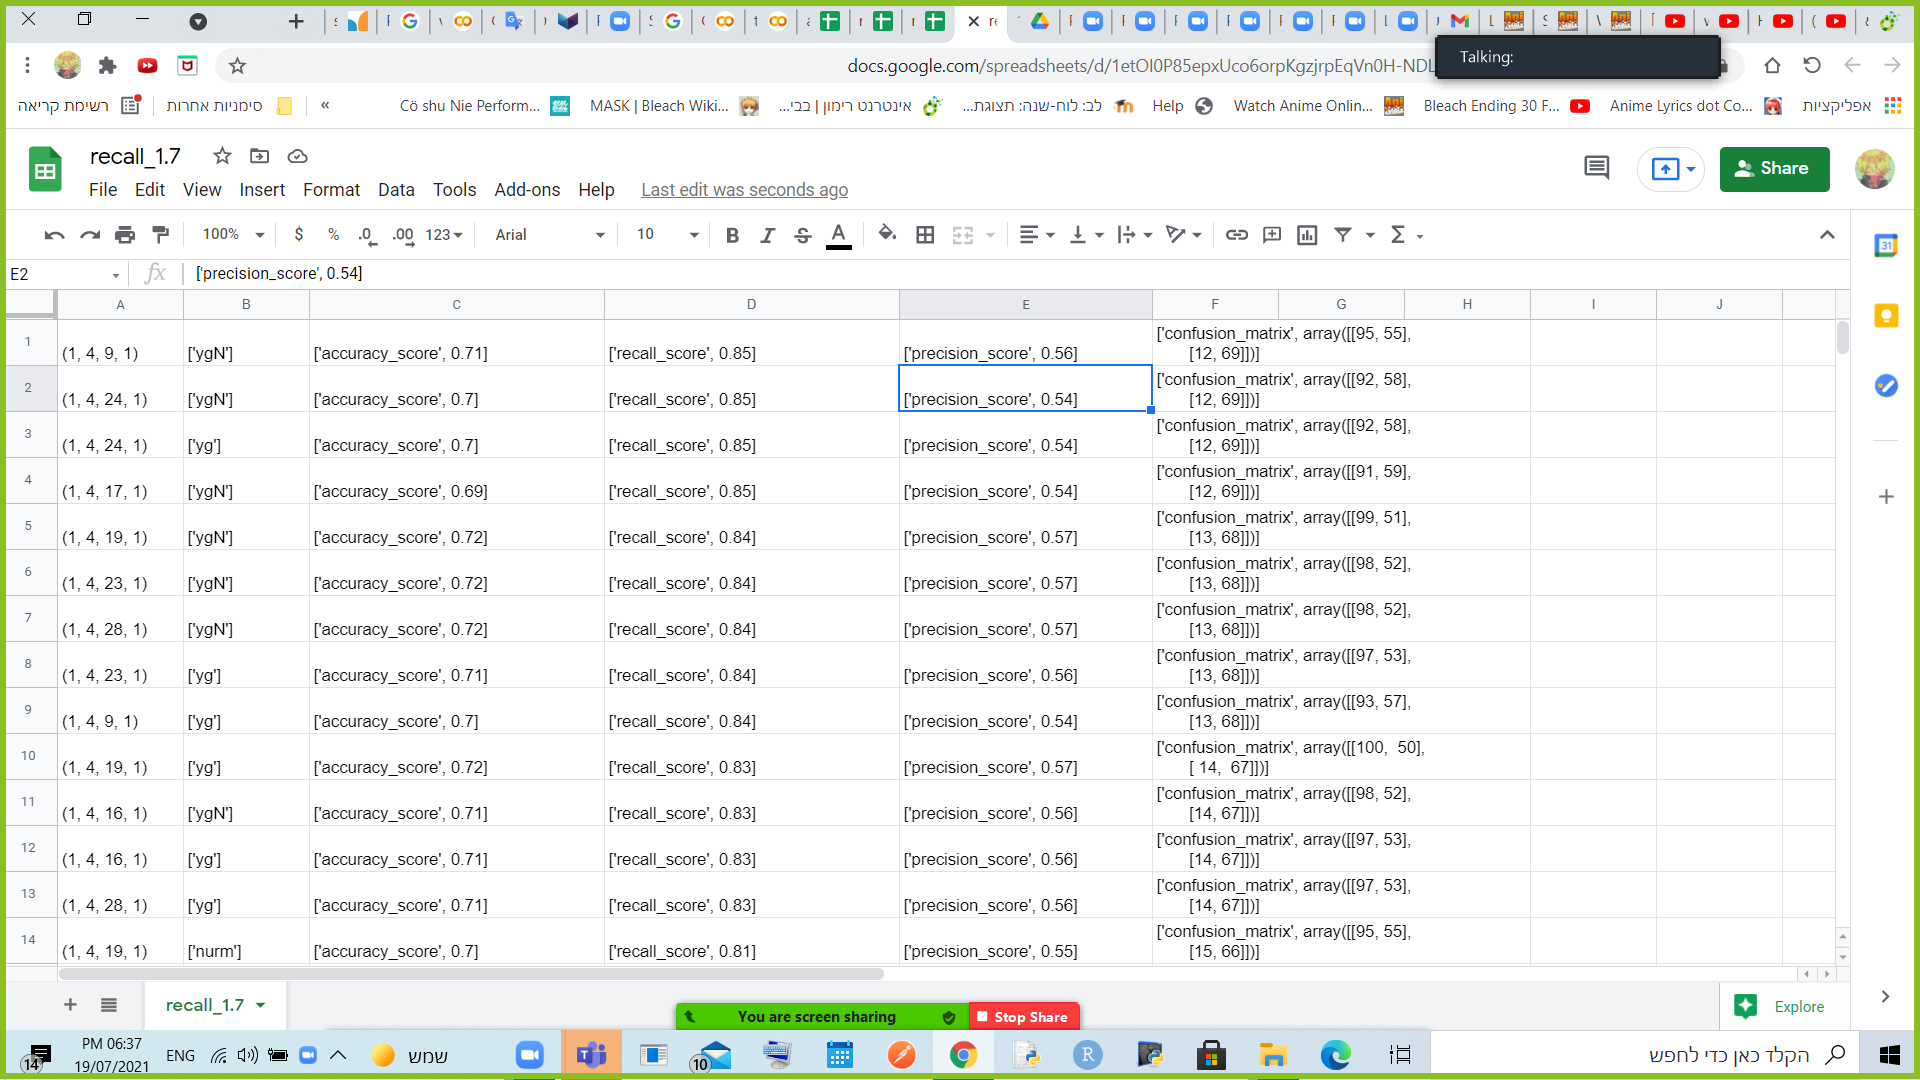

חשוב לנו לציין שהתחשבנו יותר 
recall
יותר מ-
accuracy
למרות שהתחשבנו בשניהם

היה לנו חשוב יותר לתפוס את החולים גם מחיר ירידת דיוק המודל באופן כללי-גם במחיר של חיזוי שווא של חולי

although we considered the recall more than the accuracy, but we considered both of them,
we had more important to find out the sick people even with price of false prediction.